In [ ]:
pip install --quiet tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
def configure_device():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  # connect to tpu cluster
        strategy = tf.distribute.TPUStrategy(tpu) # get strategy for tpu
        print('Num of TPUs: ', strategy.num_replicas_in_sync)
        device='TPU'
    except: # otherwise detect GPUs
        tpu = None
        gpus = tf.config.list_logical_devices('GPU') # get logical gpus
        ngpu = len(gpus)
        if ngpu: # if number of GPUs are 0 then CPU
            strategy = tf.distribute.MirroredStrategy(gpus) # single-GPU or multi-GPU
            print("> Running on GPU", end=' | ')
            print("Num of GPUs: ", ngpu)
            device='GPU'
        else:
            print("> Running on CPU")
            strategy = tf.distribute.get_strategy() # connect to single gpu or cpu
            device='CPU'
    return strategy, device, tpu

In [ ]:
strategy, device, tpu = configure_device()
AUTO = tf.data.experimental.AUTOTUNE

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.84.110.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.84.110.186:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Num of TPUs:  8


In [ ]:
import pandas as pd
df  = pd.read_csv('/content/drive/MyDrive/minidata.csv')
# df = df.fillna(method='ffill')
# df = df.fillna(method='bfill')

In [ ]:
df.select_dtypes('int').columns

Index(['D_63', 'D_64', 'B_31', 'D_126', 'target'], dtype='object')

In [ ]:
cat_features  = ['B_30', 'B_38', 'D_63', 'D_64', 'D_66', 'D_68', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126']
cont_features = [x for x in list(df.columns) if x not in cat_features]
len(cont_features)

178

In [ ]:
len(cat_features)

11

In [ ]:
ff = list(df.select_dtypes('int').columns)
tt  = [x for x in list(df.columns) if x not in ff]
print(len(ff))
print(len(tt))
print(df.shape[1])

5
184
189


In [ ]:
import numpy as np

def parse_tfr_element(element):
  data = {}
  for col in ff:
    data[col] = tf.io.FixedLenFeature([], tf.int64)

  for col in tt:
    data[col] = tf.io.FixedLenFeature([], tf.float32)
  
    
  content = tf.io.parse_single_example(element, data)
  
  my_arr = []
  for col in list(df.columns):
    my_arr.append(content[col])
  return my_arr

In [ ]:
def get_dataset_small(filename):
  dataset = tf.data.TFRecordDataset(filename)
  dataset = dataset.map(
      parse_tfr_element
  )
  return dataset
gspath = 'gs://kds-bbda14c6ba4300af481c96af7d145ddf21642544093f223c2ac8ef0b'
filename = tf.io.gfile.glob(gspath + '/*.tfrecord')
dataset_small = get_dataset_small(filename[0])

In [ ]:
from tqdm import tqdm
arr = []
for i in tqdm(dataset_small.take(100)):
  temp = [j.numpy() for j in i]
  arr.append(temp)

100it [00:31,  3.17it/s]


In [ ]:
arr = np.array(arr)
arr.shape

(100, 189)

In [ ]:
df1 = pd.DataFrame(arr,columns=list(df.columns))
df1

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0.62300,0.000249,0.006420,0.817400,0.000715,0.1614,0.009680,0.011020,0.04172,0.03622,...,0.004665,0.006330,0.008880,0.003250,0.004635,0.32960,0.002626,0.002804,0.007355,0.0
1,0.67200,0.184000,0.029130,1.007000,0.000747,0.4524,0.000583,0.009810,0.04172,0.12340,...,0.004665,0.006330,1.003000,0.002089,0.931000,0.32960,1.003000,1.191000,0.186600,0.0
2,0.07710,0.567400,0.026230,1.010000,0.009430,0.1617,0.008480,0.011795,0.04172,0.15580,...,0.004665,0.006330,0.000492,0.008250,0.008590,0.32960,0.007107,0.004430,0.000937,1.0
3,0.98700,0.008520,0.039340,0.812000,0.004604,0.2085,0.003180,0.013626,0.04172,0.10890,...,0.004665,0.006330,0.009440,0.009400,0.002674,0.32960,0.009590,0.007310,0.001398,0.0
4,0.05292,1.006000,0.108150,0.006660,0.501000,0.1520,0.981000,0.034420,0.04172,0.29880,...,0.004665,0.006330,0.000756,0.003809,0.002684,0.32960,0.008000,0.002956,0.002918,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.82570,0.007103,0.006824,1.005000,0.009620,0.0479,0.004100,0.005733,0.06744,0.10223,...,0.004383,0.504400,0.008156,0.005363,0.003405,0.44780,0.003664,0.006040,0.008550,0.0
96,-0.04312,0.006996,0.855500,0.000773,0.006626,0.1827,0.692400,0.241600,0.07180,0.10223,...,0.002506,0.009544,0.005745,0.004364,0.004852,0.44780,0.002655,0.004390,0.005530,1.0
97,0.05817,0.241200,0.402800,0.027590,0.501000,0.2249,0.008250,0.870600,0.07180,0.10736,...,0.002506,0.009544,1.004000,0.005604,0.988300,0.68900,1.009000,0.001042,0.276900,1.0
98,0.54250,0.623000,0.214800,0.057400,1.001000,0.6740,0.888000,0.566000,0.07180,0.25050,...,0.002506,0.009544,1.004000,1.009000,0.888000,0.10144,1.006000,0.007618,0.095100,1.0


In [ ]:
def get_X_from_groups(feature_set, groups):
    result = []
    for group in groups:
        result.append(feature_set[group])
    return result

def get_X_from_features(feature_set, cont_features, cat_features):
    groups = [cont_features]
    groups.extend(cat_features)
    return get_X_from_groups(feature_set, groups)

In [ ]:
cont_features.remove('target')
len(cont_features)

177

In [ ]:
cats = []
for col in cat_features:
  cats.append(df1[col].unique().shape[0])

In [ ]:
cats

[2, 7, 5, 4, 1, 6, 2, 2, 7, 2, 2]

In [ ]:
X = get_X_from_features(df1.drop(columns=['target'],axis=1),cont_features,cat_features)
y = df1['target']

In [ ]:
import tensorflow as tf 
import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
df2 = df1.drop(columns=['target'],axis=1)
y = y.to_numpy()

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        # parametreleri
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        # batch-layer
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class FTTransformer(keras.Model):

    def __init__(self, 
            categories,
            num_continuous,
            dim,
            dim_out,
            depth,
            embedding_dim,
            heads,
            attn_dropout,
            ff_dropout,
            mlp_hidden,
            normalize_continuous = True):

        super(FTTransformer, self).__init__()

        # --> continuous inputs
        self.embedding_dim = embedding_dim
        self.normalize_continuous = normalize_continuous
        if normalize_continuous:
            self.continuous_normalization = layers.LayerNormalization()

        # --> categorical inputs

        # embedding
        self.embedding_layers = []
        for number_of_classes in categories:
            self.embedding_layers.append(layers.Embedding(input_dim = number_of_classes, output_dim = dim))
        # self.embedding_layers_cont = []
        # for number_of_classes in range(177):
        #     self.embedding_layers_cont.append(layers.Embedding(input_dim = 10, output_dim = dim))
        self.embb = layers.Embedding(input_dim = 1000, output_dim = dim)
        self.flatten_output = layers.Flatten()

        # concatenation
        self.embedded_concatenation = layers.Concatenate(axis=1)
        self.cont_embedded_concatenation = layers.Concatenate(axis=1)

        # adding transformers
        self.transformers = []
        for _ in range(depth):
            self.transformers.append(TransformerBlock(dim, heads, dim))
        self.flatten_transformer_output = layers.Flatten()

        # --> MLP
        self.pre_concatenation = layers.Concatenate(axis=1)

        # mlp layers
        self.mlp_layers = []
        for size, activation in mlp_hidden:
            self.mlp_layers.append(layers.Dense(size, activation=activation))

        self.output_layer = layers.Dense(dim_out)

    def call(self, inputs):
        continuous_inputs  = inputs[0]
        categorical_inputs = inputs[1:]
        # print(continuous_inputs.shape, type(categorical_inputs))
        # --> continuous
        if self.normalize_continuous:
            continuous_inputs = self.continuous_normalization(continuous_inputs)
    
        # cont_embedding_outputs = []
        # print(continuous_inputs.transpoghjse()[0].shape)
        # for continuous_input, embedding_layer in zip(tf.unstack(tf.transpose(continuous_inputs)), self.embedding_layers_cont):
        #     cont_embedding_outputs.append(tf.expand_dims(embedding_layer(continuous_input),axis=1))
        # continuous_inputs = self.cont_embedded_concatenation(cont_embedding_outputs)
        continuous_inputs = self.embb(continuous_inputs)
        # print(cont_embedding_outputs[0].shape)
        # --> categorical
        embedding_outputs = []
        for categorical_input, embedding_layer in zip(categorical_inputs, self.embedding_layers):
            embedding_outputs.append(embedding_layer(categorical_input))
        categorical_inputs = self.embedded_concatenation(embedding_outputs)
        # print(embedding_outputs[0].shape)
        # print(embedding_outputs[0].shape)
        # print(categorical_inputs.shape)
        trans_input = self.pre_concatenation([continuous_inputs, categorical_inputs])
        
        for transformer in self.transformers:
            trans_input = transformer(trans_input)
        mlp_input = self.flatten_transformer_output(trans_input)
        # print(categorical_inputs.shape)
        # --> MLP
        # print(mlp_input.shape)
        for mlp_layer in self.mlp_layers:
            mlp_input = mlp_layer(mlp_input)
        return self.output_layer(mlp_input)
  

In [ ]:
with strategy.scope():
  model = FTTransformer(
        categories = cats, # number of unique elements in each categorical feature
        num_continuous = 177,      # number of numerical features
        dim = 16,                # embedding/transformer dimension
        dim_out = 1,             # dimension of the model output
        depth = 6,  
        embedding_dim=256,             # number of transformer layers in the stack
        heads = 8,               # number of attention heads
        attn_dropout = 0.1,      # attention layer dropout in transformers
        ff_dropout = 0.1,        # feed-forward layer dropout in transformers
        mlp_hidden = [(1024, 'relu'),(256, 'relu'),(128, 'relu'),(64, 'relu'), (32, 'relu')] # mlp layer dimensions and activations
    )

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X,y,epochs=5,validation_split=0.2,batch_size=32,verbose=1)

Epoch 1/5


3/3 [==============================] - 45s 8s/step - loss: 2.3151 - accuracy: 0.8500 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 1s 349ms/step - loss: 2.3137 - accuracy: 0.8500 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 1s 344ms/step - loss: 2.3137 - accuracy: 0.8500 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 1s 356ms/step - loss: 2.3137 - accuracy: 0.8500 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 1s 350ms/step - loss: 2.3137 - accuracy: 0.8500 - val_loss: 7.7125 - val_accuracy: 0.5000


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
acc_per_fold=[]
loss_per_fold = []
# K-fold Cross Validation model evaluation
fold_no = 1
with strategy.scope():
  for train, test in kfold.split(df2, y):
    train = list(train)
    test = list(test)
    train_df = df2.iloc[train]
    test_df = df2.iloc[test]
    train_y = y[train]
    test_y = y[test]
    train_X = get_X_from_features(train_df,cont_features,cat_features)
    test_X = get_X_from_features(test_df,cont_features,cat_features)
    
    model = FTTransformer(
        categories = cats, # number of unique elements in each categorical feature
        num_continuous = 177,      # number of numerical features
        dim = 16,                # embedding/transformer dimension
        dim_out = 1,             # dimension of the model output
        depth = 6,  
        embedding_dim=256,             # number of transformer layers in the stack
        heads = 8,               # number of attention heads
        attn_dropout = 0.1,      # attention layer dropout in transformers
        ff_dropout = 0.1,        # feed-forward layer dropout in transformers
        mlp_hidden = [(64, 'relu'),(32, 'relu'), (16, 'relu')] # mlp layer dimensions and activations
    )

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(train_X,train_y,epochs=3,validation_split=0.2,batch_size=32,verbose=1)
    

    # Generate generalization metrics
    scores = model.evaluate(test_X, test_y, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3


1/1 [==============================] - 27s 27s/step - loss: 0.6941 - accuracy: 0.6562 - val_loss: 0.6230 - val_accuracy: 0.6250
Epoch 2/3
1/1 [==============================] - 1s 712ms/step - loss: 0.4882 - accuracy: 0.7188 - val_loss: 1.9360 - val_accuracy: 0.8750
Epoch 3/3
1/1 [==============================] - 1s 694ms/step - loss: 3.0382 - accuracy: 0.7500 - val_loss: 0.4799 - val_accuracy: 0.8750
Score for fold 1: loss of 0.5756421685218811; accuracy of 80.0000011920929%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3


1/1 [==============================] - 31s 31s/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 2/3
1/1 [==============================] - 1s 717ms/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 3/3
1/1 [==============================] - 1s 724ms/step - loss: 3.8562 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Score for fold 2: loss of 1.542490839958191; accuracy of 90.00000357627869%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/3


1/1 [==============================] - 28s 28s/step - loss: 3.4011 - accuracy: 0.7812 - val_loss: 1.9281 - val_accuracy: 0.8750
Epoch 2/3
1/1 [==============================] - 1s 711ms/step - loss: 3.3742 - accuracy: 0.7812 - val_loss: 1.9281 - val_accuracy: 0.8750
Epoch 3/3
1/1 [==============================] - 1s 698ms/step - loss: 3.3742 - accuracy: 0.7812 - val_loss: 1.9281 - val_accuracy: 0.8750
Score for fold 3: loss of 4.627472877502441; accuracy of 69.9999988079071%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/3


1/1 [==============================] - 27s 27s/step - loss: 0.4602 - accuracy: 0.7500 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 2/3
1/1 [==============================] - 1s 690ms/step - loss: 2.8922 - accuracy: 0.8125 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 3/3
1/1 [==============================] - 1s 686ms/step - loss: 2.8922 - accuracy: 0.8125 - val_loss: 3.8562 - val_accuracy: 0.7500
Score for fold 4: loss of 4.627472877502441; accuracy of 69.9999988079071%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/3


1/1 [==============================] - 28s 28s/step - loss: 3.3742 - accuracy: 0.7812 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 2/3
1/1 [==============================] - 1s 703ms/step - loss: 3.3742 - accuracy: 0.7812 - val_loss: 3.8562 - val_accuracy: 0.7500
Epoch 3/3
1/1 [==============================] - 1s 684ms/step - loss: 3.3742 - accuracy: 0.7812 - val_loss: 3.8562 - val_accuracy: 0.7500
Score for fold 5: loss of 3.084981679916382; accuracy of 80.0000011920929%


In [ ]:
model.save_weights('fttransformer.h5', overwrite=True)

In [ ]:
!cp gatedtab.h5 drive/MyDrive/

cp: cannot stat 'gatedtab.h5': No such file or directory


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


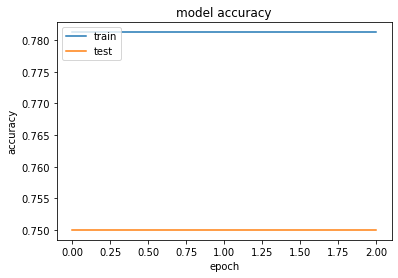

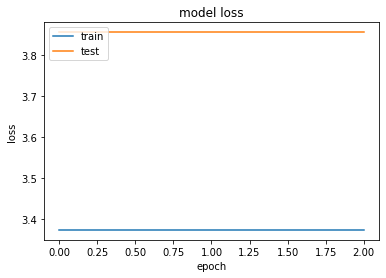

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pip install --quiet shap

     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
import matplotlib.pyplot as plt
def f(inp):
    inp = pd.DataFrame(inp,columns=list(df.columns))
    X = get_X_from_features(inp.drop(columns=['target'],axis=1),cont_features,cat_features)
    return model.predict(X).flatten()

explainer = shap.KernelExplainer(f, df1.iloc[:50,:])

  0%|          | 0/50 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

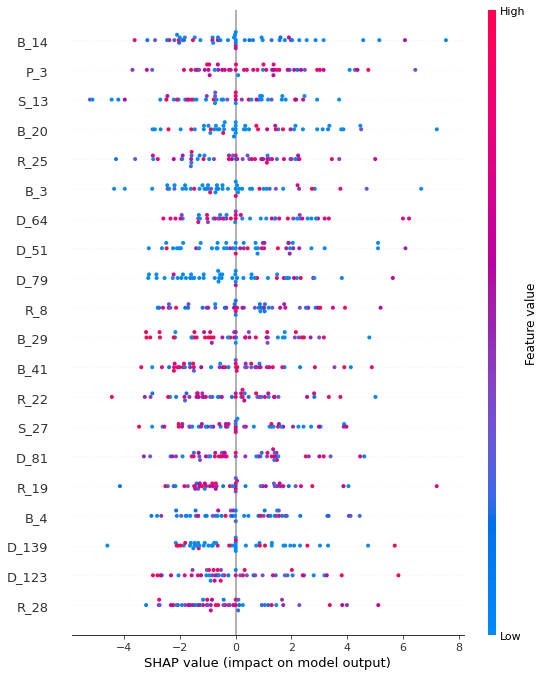

In [ ]:
shap_values50 = explainer.shap_values(df1.iloc[:50,:], nsamples=500)
fig = shap.summary_plot(shap_values50, df1.iloc[:50,:],show=False)
plt.savefig('shap.png', dpi=600, bbox_inches='tight')
plt.show()